# ✅ **Problem Statement**
  -  We want to analyze how features such as Make, Model, Year, Trim, MSRP, Body Style, Engine details, Transmission, Horsepower, Torque, and Fuel Economy influence car prices.
  - We need to identify which of these attributes have the strongest impact on determining the price.
  - We aim to use this understanding to build a machine learning model that can predict car prices accurately.

# ✅ Loading Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_excel("car_data.xlsx")

In [5]:
df.head()

index          Make   Model  Year                    Trim      MSRP  \
0      0  Aston Martin  DBX707  2024                    Base  $242,000   
1      1          Audi      A3  2024       Premium w/40 TFSI   $35,800   
2      2          Audi      A3  2024       Premium w/40 TFSI   $37,800   
3      3          Audi      A3  2024  Premium Plus w/40 TFSI   $41,400   
4      4          Audi      A3  2024  Premium Plus w/40 TFSI   $39,400   

  Invoice Price Used/New Price Body Size Body Style Cylinders  \
0           NaN       $242,000     Large        SUV        V8   
1       $33,653        $35,800   Compact      Sedan        I4   
2       $35,533        $37,800   Compact      Sedan        I4   
3       $38,917        $41,400   Compact      Sedan        I4   
4       $37,037        $39,400   Compact      Sedan        I4   

  Engine Aspiration Drivetrain Transmission         Horsepower  \
0        Twin-Turbo        AWD    automatic  697 hp @ 6000 rpm   
1      Turbocharged        FWD    automatic  201 hp @ 4800 rpm   
2      Turbocharged        AWD    automatic  201 hp @ 5000 rpm   
3      Turbocharged        AWD    automatic  201 hp @ 5000 rpm   
4      Turbocharged        FWD    automatic  201 hp @ 4800 rpm   

                   Torque Highway Fuel Economy  
0  663 ft-lbs. @ 2750 rpm               20 mpg  
1  221 ft-lbs. @ 4100 rpm               37 mpg  
2  221 ft-lbs. @ 4000 rpm               34 mpg  
3  221 ft-lbs. @ 4000 rpm               34 mpg  
4  221 ft-lbs. @ 4100 rpm               37 mpg

In [6]:
df.shape

(1610, 17)

In [7]:
df.dtypes

index                    int64
Make                    object
Model                   object
Year                     int64
Trim                    object
MSRP                    object
Invoice Price           object
Used/New Price          object
Body Size               object
Body Style              object
Cylinders               object
Engine Aspiration       object
Drivetrain              object
Transmission            object
Horsepower              object
Torque                  object
Highway Fuel Economy    object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non-null   

# ✅ Exploratory Data Analysis (EDA)

In [10]:

def categorical_stats(data):
    for col in data:
        print("*"*10,col,"*"*10)
        print(data[col].agg(["count","nunique","unique"]))
        print("value_counts",data[col].value_counts())

In [11]:
cat_df = df.select_dtypes(include=["object"])

In [12]:
categorical_stats(cat_df)

********** Make **********
count                                                   1610
nunique                                                    7
unique     [Aston Martin, Audi, BMW, Bentley, Ford, Merce...
Name: Make, dtype: object
value_counts Make
Ford             626
Mercedes-Benz    262
Audi             252
Nissan           210
BMW              178
Bentley           73
Aston Martin       9
Name: count, dtype: int64
********** Model **********
count                                                   1610
nunique                                                  150
unique     [DBX707, A3, A4, A4 allroad, A5, A6, A6 allroa...
Name: Model, dtype: object
value_counts Model
Sprinter             97
Transit Cargo Van    84
F-350 Super Duty     78
F-150                66
F-250 Super Duty     50
                     ..
M4 CSL                1
M5                    1
TTS                   1
CLS-Class             1
Maybach EQS SUV       1
Name: count, Length: 150, dtype: int64
********** Tr

# ✅ Data Cleaning

In [14]:
df.isnull().sum()

index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64

In [15]:
df = df.drop(columns=["Invoice Price","Cylinders","Highway Fuel Economy"],axis=1)

In [16]:
df.head()

index          Make   Model  Year                    Trim      MSRP  \
0      0  Aston Martin  DBX707  2024                    Base  $242,000   
1      1          Audi      A3  2024       Premium w/40 TFSI   $35,800   
2      2          Audi      A3  2024       Premium w/40 TFSI   $37,800   
3      3          Audi      A3  2024  Premium Plus w/40 TFSI   $41,400   
4      4          Audi      A3  2024  Premium Plus w/40 TFSI   $39,400   

  Used/New Price Body Size Body Style Engine Aspiration Drivetrain  \
0       $242,000     Large        SUV        Twin-Turbo        AWD   
1        $35,800   Compact      Sedan      Turbocharged        FWD   
2        $37,800   Compact      Sedan      Turbocharged        AWD   
3        $41,400   Compact      Sedan      Turbocharged        AWD   
4        $39,400   Compact      Sedan      Turbocharged        FWD   

  Transmission         Horsepower                  Torque  
0    automatic  697 hp @ 6000 rpm  663 ft-lbs. @ 2750 rpm  
1    automatic  201 hp @ 4800 rpm  221 ft-lbs. @ 4100 rpm  
2    automatic  201 hp @ 5000 rpm  221 ft-lbs. @ 4000 rpm  
3    automatic  201 hp @ 5000 rpm  221 ft-lbs. @ 4000 rpm  
4    automatic  201 hp @ 4800 rpm  221 ft-lbs. @ 4100 rpm

In [17]:
df['Horsepower_No'] = df['Horsepower'].str[0:3].astype(float)

In [18]:
df[df['Horsepower_No'].isna()]

index  Make            Model  Year      Trim     MSRP Used/New Price  \
371    971  Ford  F-150 Lightning  2024     Flash  $67,995        $67,995   
372    972  Ford  F-150 Lightning  2024    Lariat  $76,995        $76,995   
373    973  Ford  F-150 Lightning  2024  Platinum  $84,995        $84,995   
374    974  Ford  F-150 Lightning  2024       Pro  $54,995        $54,995   
375    975  Ford  F-150 Lightning  2024       XLT  $62,995        $62,995   

    Body Size    Body Style Engine Aspiration Drivetrain Transmission  \
371     Large  Pickup Truck    Electric Motor        4WD    automatic   
372     Large  Pickup Truck    Electric Motor        4WD    automatic   
373     Large  Pickup Truck    Electric Motor        4WD    automatic   
374     Large  Pickup Truck    Electric Motor        4WD    automatic   
375     Large  Pickup Truck    Electric Motor        4WD    automatic   

    Horsepower Torque  Horsepower_No  
371        NaN    NaN            NaN  
372        NaN    NaN            NaN  
373        NaN    NaN            NaN  
374        NaN    NaN            NaN  
375        NaN    NaN            NaN

In [19]:
mean_horsepower = df["Horsepower_No"][df["Make"] == "Ford"].mean()

In [20]:
df["Horsepower_No"] = df["Horsepower_No"].fillna(value=mean_horsepower)
df["Horsepower"] = df["Horsepower"].fillna(value=mean_horsepower)

In [21]:
df.isnull().sum()

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Horsepower            0
Torque               27
Horsepower_No         0
dtype: int64

In [22]:
df["Torque_No"] = df["Torque"].str[0:3].astype(float)

In [23]:
mean_torque = df["Torque_No"].mean()

In [24]:
df["Torque_No"] = df["Torque_No"].fillna(value=mean_torque)
df["Torque"] = df["Torque"].fillna(value=mean_torque)

In [25]:
df.isnull().sum()

index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower           0
Torque               0
Horsepower_No        0
Torque_No            0
dtype: int64

# ✅ Cleaning the data types

In [27]:
df.head()

index          Make   Model  Year                    Trim      MSRP  \
0      0  Aston Martin  DBX707  2024                    Base  $242,000   
1      1          Audi      A3  2024       Premium w/40 TFSI   $35,800   
2      2          Audi      A3  2024       Premium w/40 TFSI   $37,800   
3      3          Audi      A3  2024  Premium Plus w/40 TFSI   $41,400   
4      4          Audi      A3  2024  Premium Plus w/40 TFSI   $39,400   

  Used/New Price Body Size Body Style Engine Aspiration Drivetrain  \
0       $242,000     Large        SUV        Twin-Turbo        AWD   
1        $35,800   Compact      Sedan      Turbocharged        FWD   
2        $37,800   Compact      Sedan      Turbocharged        AWD   
3        $41,400   Compact      Sedan      Turbocharged        AWD   
4        $39,400   Compact      Sedan      Turbocharged        FWD   

  Transmission         Horsepower                  Torque  Horsepower_No  \
0    automatic  697 hp @ 6000 rpm  663 ft-lbs. @ 2750 rpm          697.0   
1    automatic  201 hp @ 4800 rpm  221 ft-lbs. @ 4100 rpm          201.0   
2    automatic  201 hp @ 5000 rpm  221 ft-lbs. @ 4000 rpm          201.0   
3    automatic  201 hp @ 5000 rpm  221 ft-lbs. @ 4000 rpm          201.0   
4    automatic  201 hp @ 4800 rpm  221 ft-lbs. @ 4100 rpm          201.0   

   Torque_No  
0      663.0  
1      221.0  
2      221.0  
3      221.0  
4      221.0

In [28]:
df["MSRP"] = df["MSRP"].str.replace("$",'')

df["MSRP"] = df["MSRP"].str.replace(",",'').astype(float)

In [29]:
df["Used/New Price"] = df["Used/New Price"].str.replace("$","")

df["Used/New Price"] = df["Used/New Price"].str.replace(",","").astype(float)

In [30]:
df.head()

index          Make   Model  Year                    Trim      MSRP  \
0      0  Aston Martin  DBX707  2024                    Base  242000.0   
1      1          Audi      A3  2024       Premium w/40 TFSI   35800.0   
2      2          Audi      A3  2024       Premium w/40 TFSI   37800.0   
3      3          Audi      A3  2024  Premium Plus w/40 TFSI   41400.0   
4      4          Audi      A3  2024  Premium Plus w/40 TFSI   39400.0   

   Used/New Price Body Size Body Style Engine Aspiration Drivetrain  \
0        242000.0     Large        SUV        Twin-Turbo        AWD   
1         35800.0   Compact      Sedan      Turbocharged        FWD   
2         37800.0   Compact      Sedan      Turbocharged        AWD   
3         41400.0   Compact      Sedan      Turbocharged        AWD   
4         39400.0   Compact      Sedan      Turbocharged        FWD   

  Transmission         Horsepower                  Torque  Horsepower_No  \
0    automatic  697 hp @ 6000 rpm  663 ft-lbs. @ 2750 rpm          697.0   
1    automatic  201 hp @ 4800 rpm  221 ft-lbs. @ 4100 rpm          201.0   
2    automatic  201 hp @ 5000 rpm  221 ft-lbs. @ 4000 rpm          201.0   
3    automatic  201 hp @ 5000 rpm  221 ft-lbs. @ 4000 rpm          201.0   
4    automatic  201 hp @ 4800 rpm  221 ft-lbs. @ 4100 rpm          201.0   

   Torque_No  
0      663.0  
1      221.0  
2      221.0  
3      221.0  
4      221.0

# ✅ visual analaysis for numerical columns

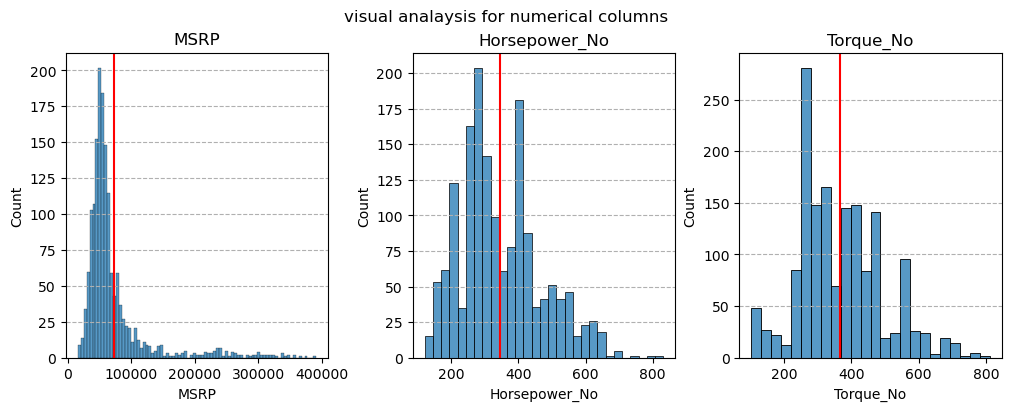

In [32]:
fig,axs = plt.subplots(1,3, figsize=(10,4),constrained_layout=True)
fig.suptitle("visual analaysis for numerical columns")

mean1 = df["MSRP"].mean()
mean2 = df["Horsepower_No"].mean()
mean3 = df["Torque_No"].mean()

axs[0].set_title("MSRP")
axs[0].axvline(mean1, 0,1, color = 'red')
sns.histplot(data=df,x="MSRP",ax=axs[0])
axs[0].grid(axis="y",linestyle="--",alpha=1)

axs[1].set_title("Horsepower_No")
axs[1].axvline(mean2, 0,1, color = 'red')
sns.histplot(data=df,x="Horsepower_No",ax=axs[1])
axs[1].grid(axis="y",linestyle="--",alpha=1)

axs[2].set_title("Torque_No")
axs[2].axvline(mean3, 0,1, color = 'red')
sns.histplot(data=df,x="Torque_No",ax=axs[2])
axs[2].grid(axis="y",linestyle="--",alpha=1)

plt.show()

# ✅ visual analaysis for categorical column

In [34]:
num_df = df.select_dtypes(include=["int","float"])

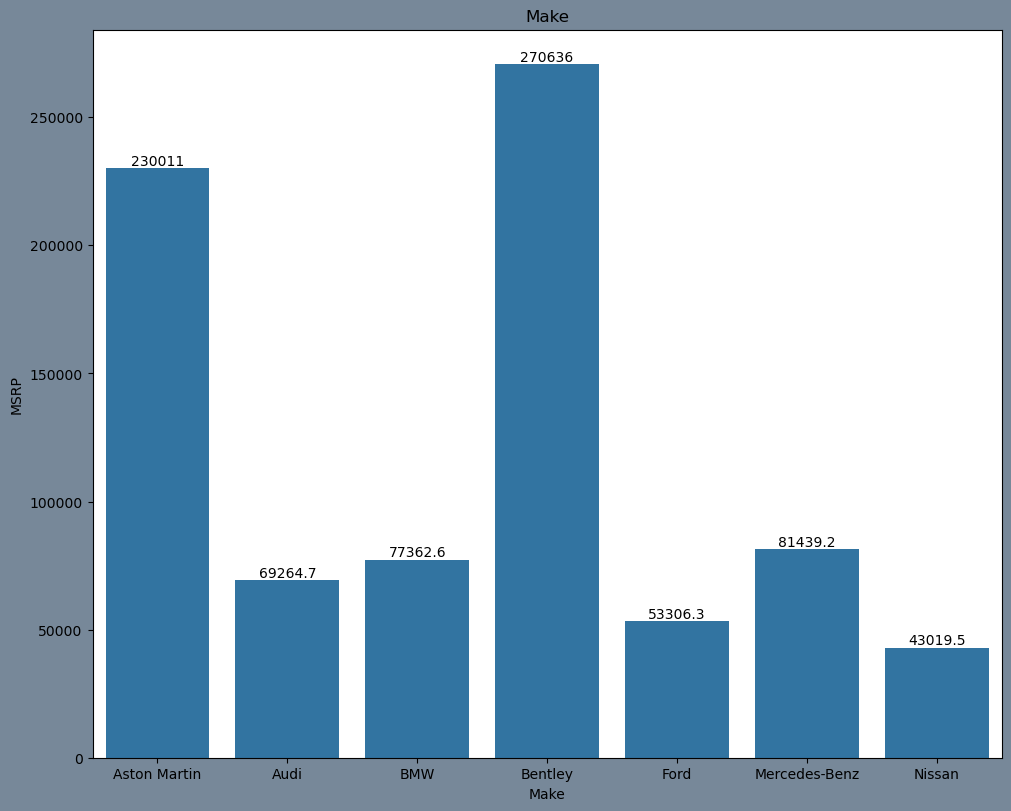

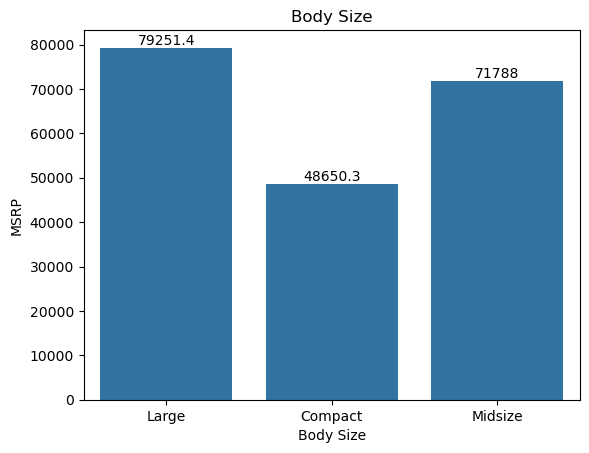

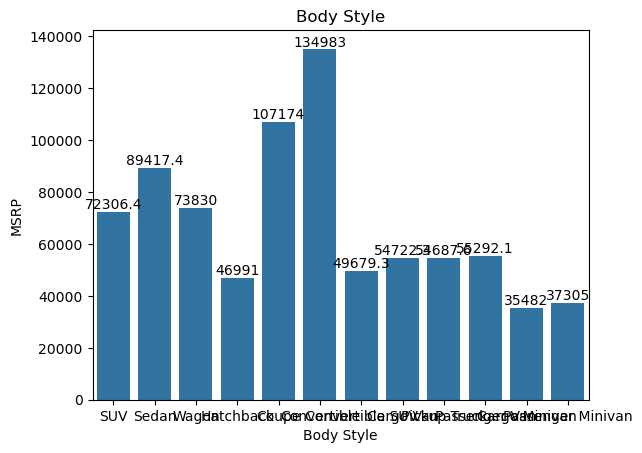

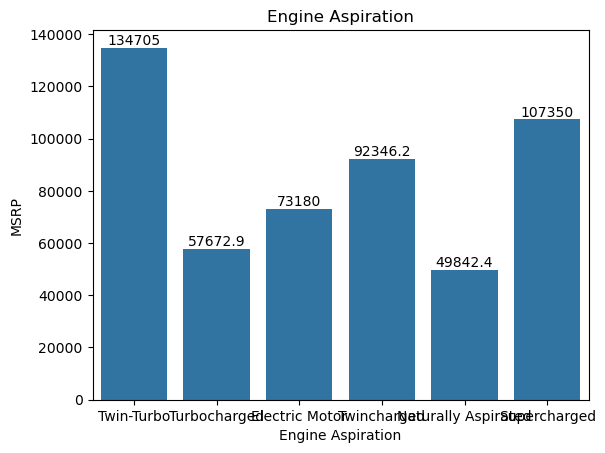

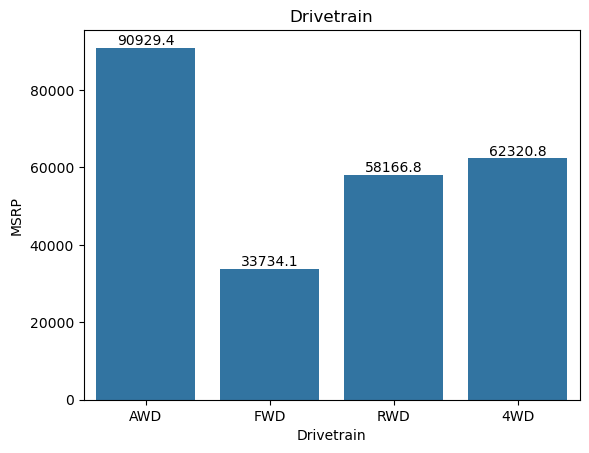

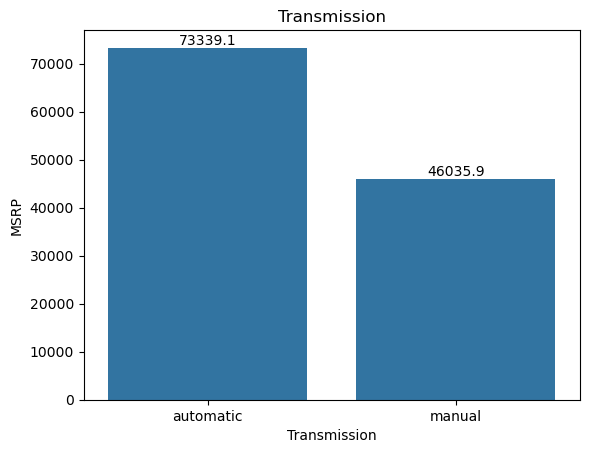

In [35]:
fig,axs = plt.subplots(figsize=(10,8),facecolor="lightslategray",constrained_layout=True)

categories = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission']

for c in categories:
    
    ax = sns.barplot(x=c, y="MSRP", data=df, errorbar=('ci', False)) #, hue = 'Model')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

# ✅ Any relation between Numerical and Numerical

In [37]:
num_df.columns

Index(['index', 'Year', 'MSRP', 'Used/New Price', 'Horsepower_No',
       'Torque_No'],
      dtype='object')

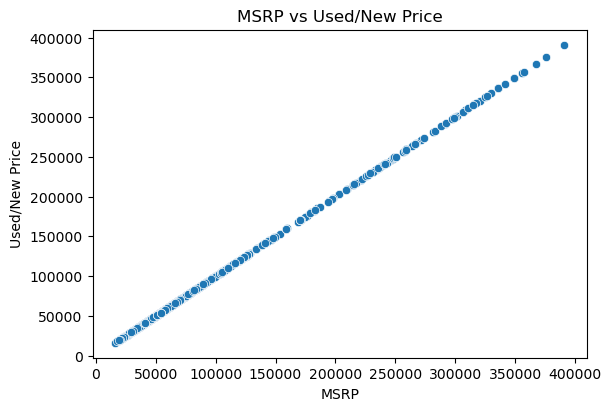

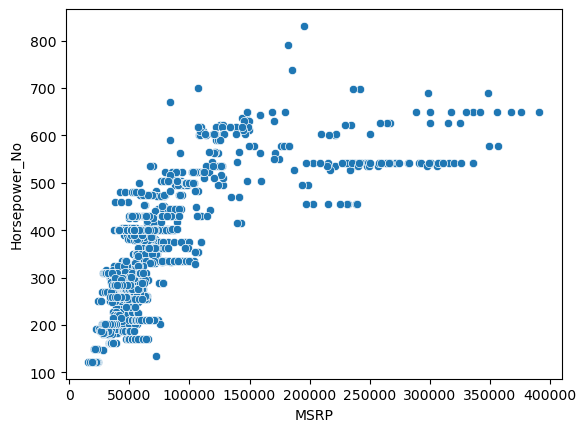

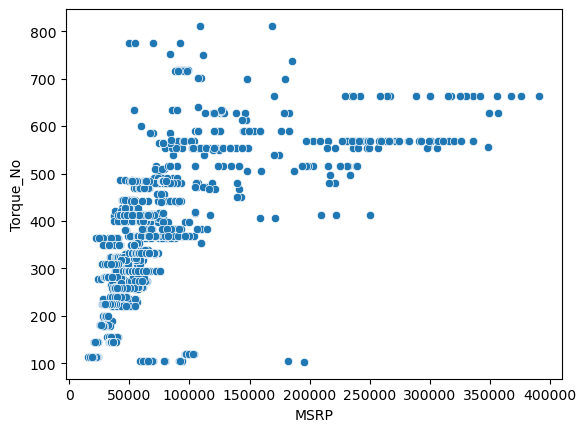

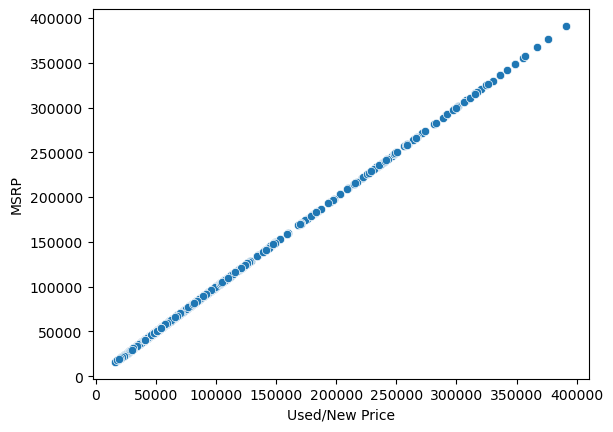

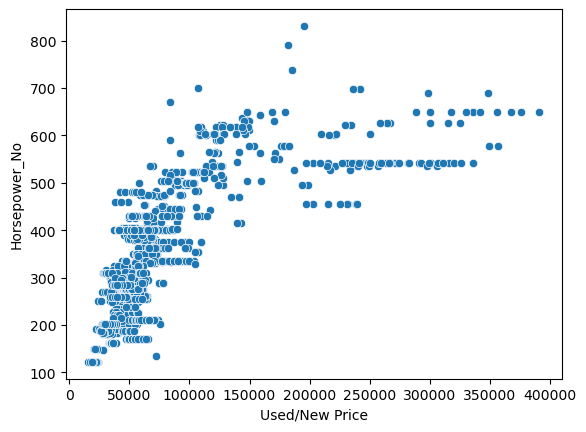

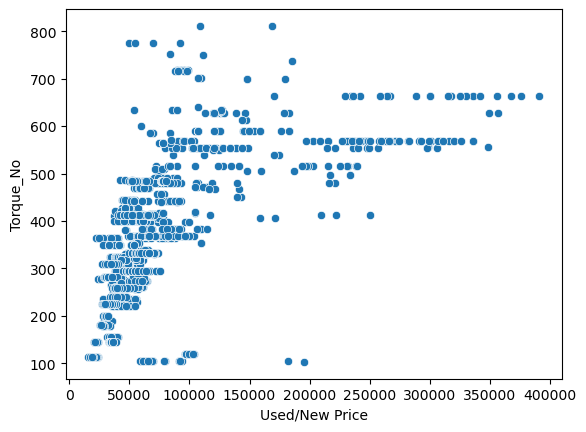

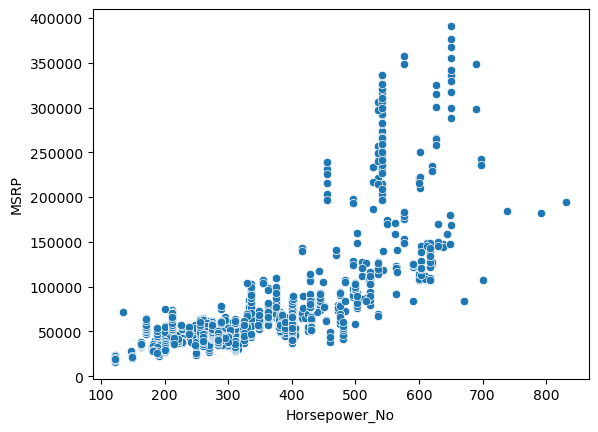

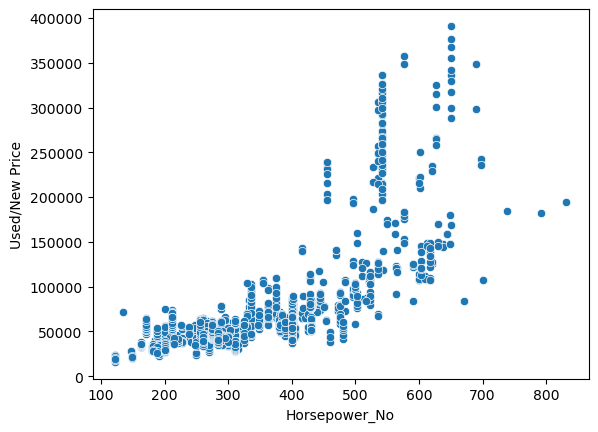

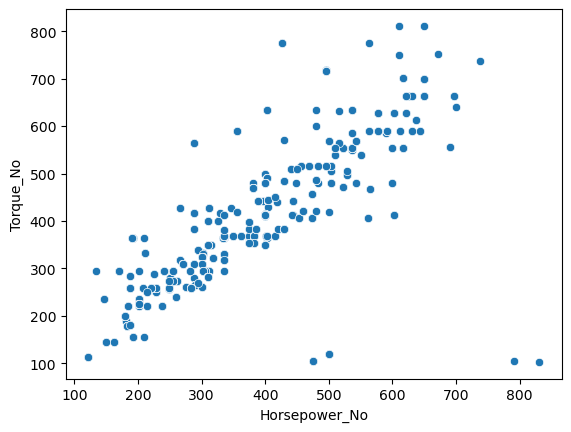

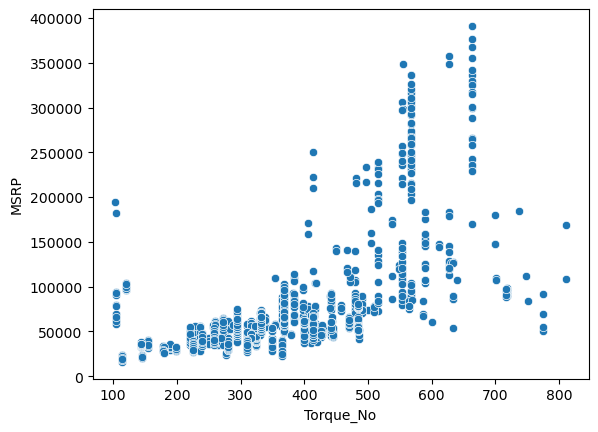

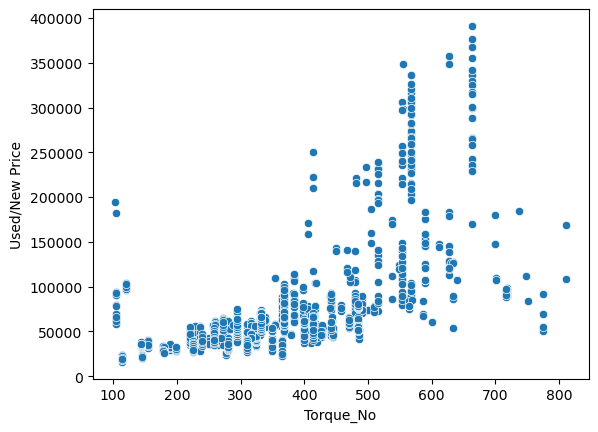

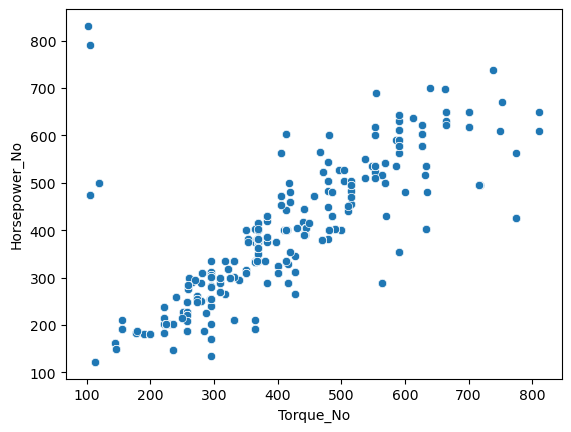

In [38]:
fig,axs = plt.subplots(figsize=(6,4),constrained_layout=True)

num_v1 = [ 'MSRP', 'Used/New Price', 'Horsepower_No', 'Torque_No']

num_v2 = ['MSRP', 'Used/New Price', 'Horsepower_No', 'Torque_No']

for num1 in num_v1:
    for num2 in num_v2:
        if num1 != num2 :
           axs.set_title(f"{num1} vs {num2}")
           sns.scatterplot(data=df,x=num1,y=num2)
           plt.show()        
    


# ✅ Any reltion between Numerical and Categorical

In [40]:
cat_df = df.select_dtypes(include=["object"])

cat_df.columns

Index(['Make', 'Model', 'Trim', 'Body Size', 'Body Style', 'Engine Aspiration',
       'Drivetrain', 'Transmission', 'Horsepower', 'Torque'],
      dtype='object')

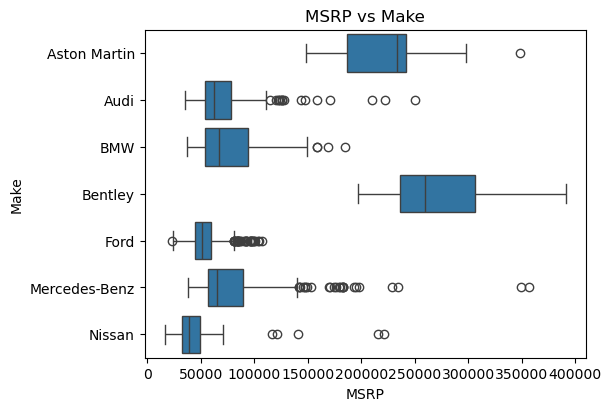

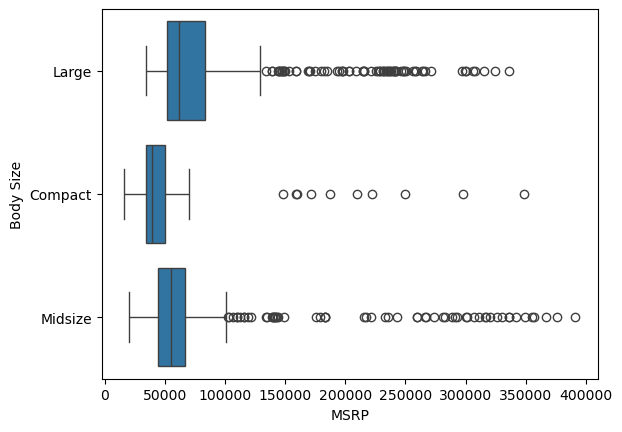

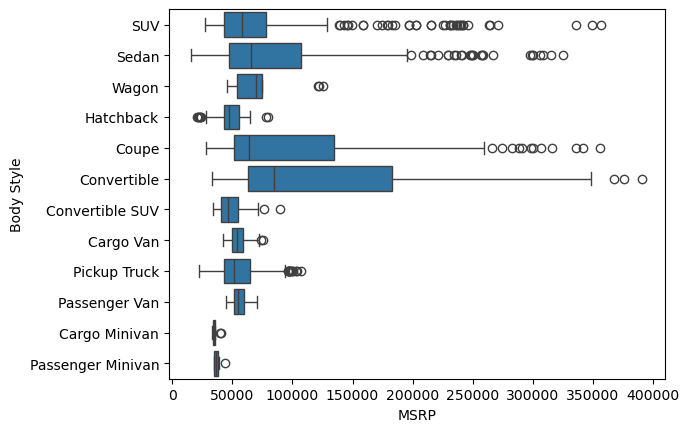

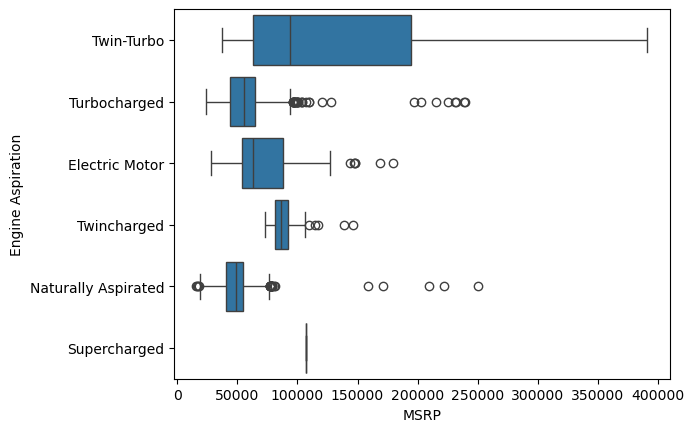

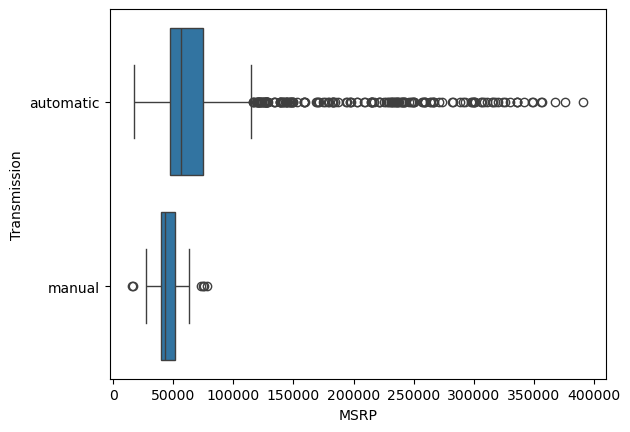

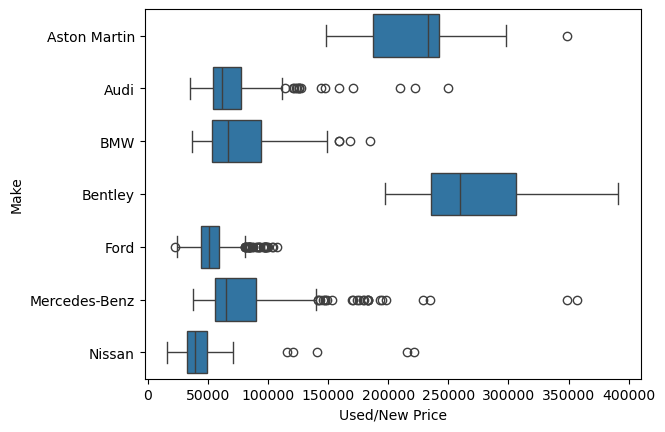

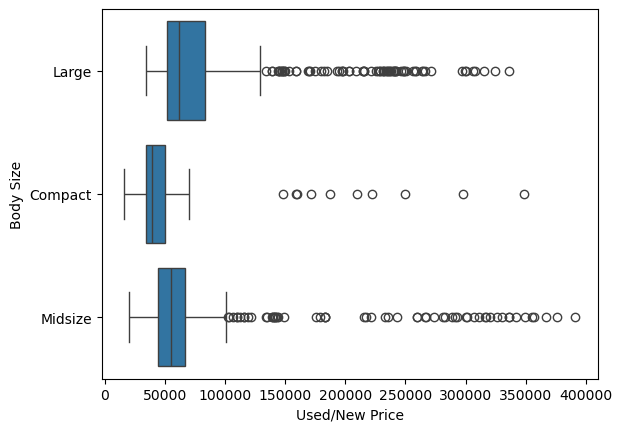

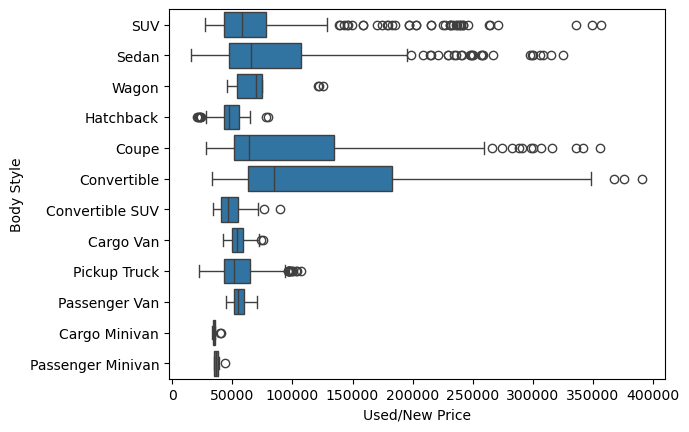

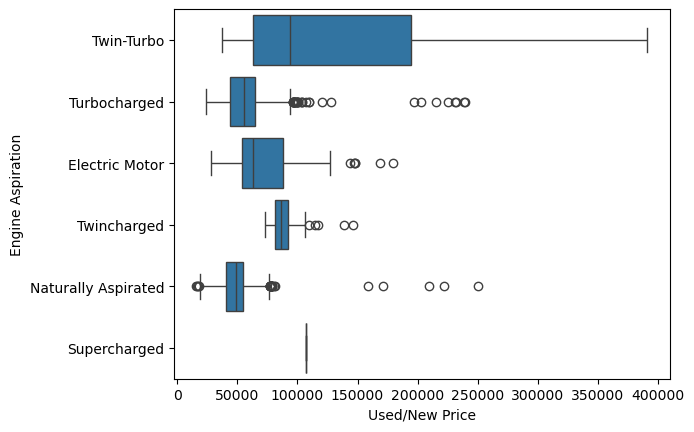

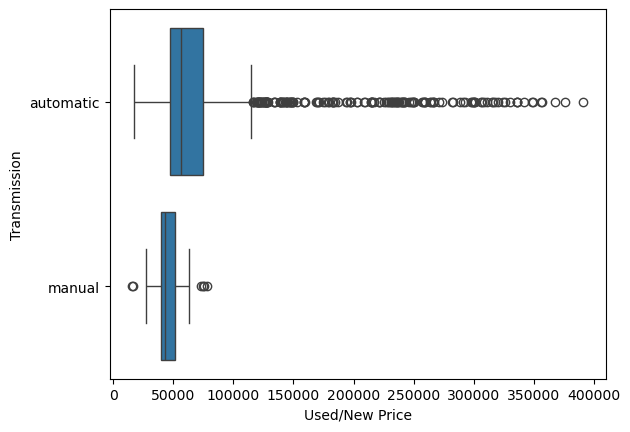

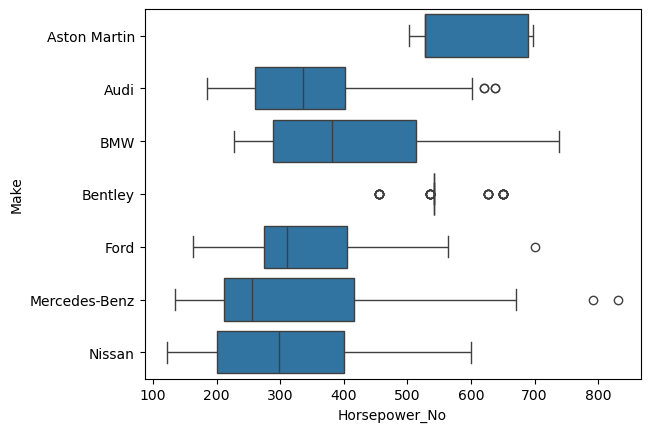

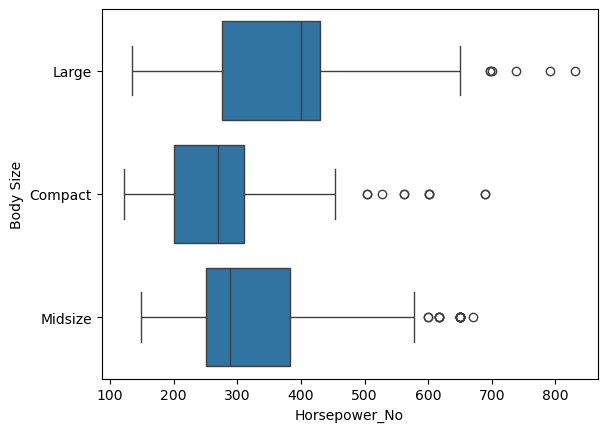

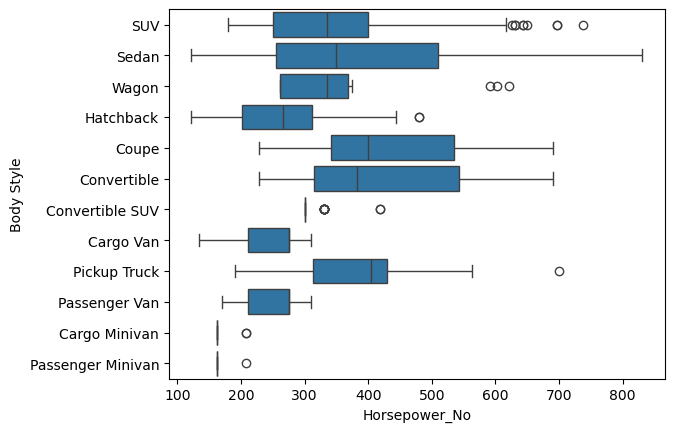

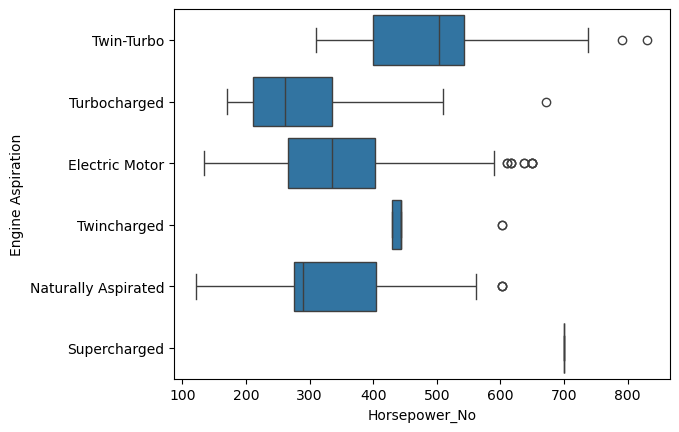

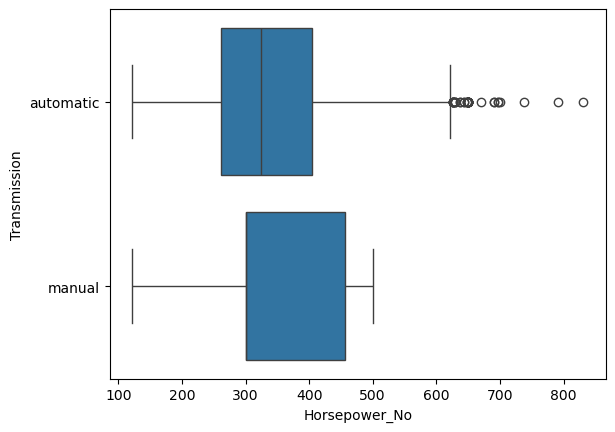

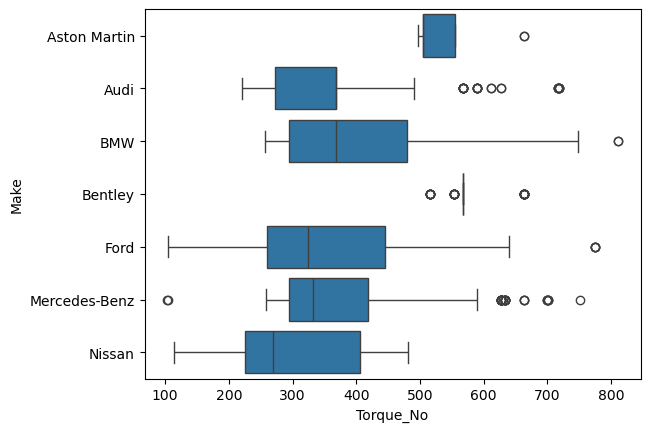

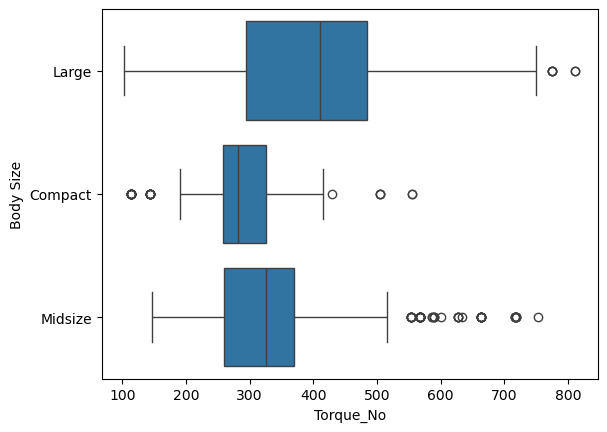

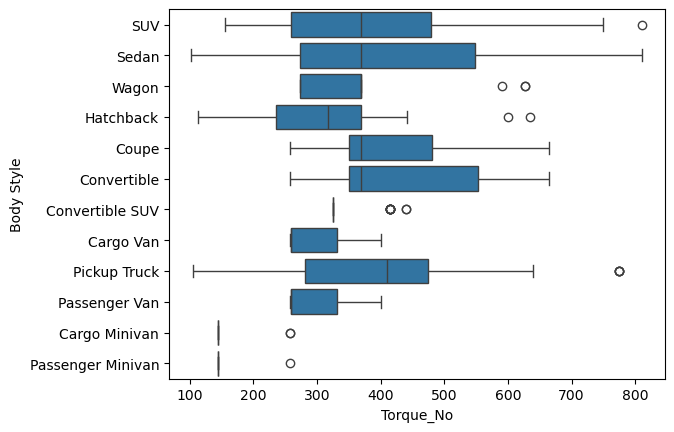

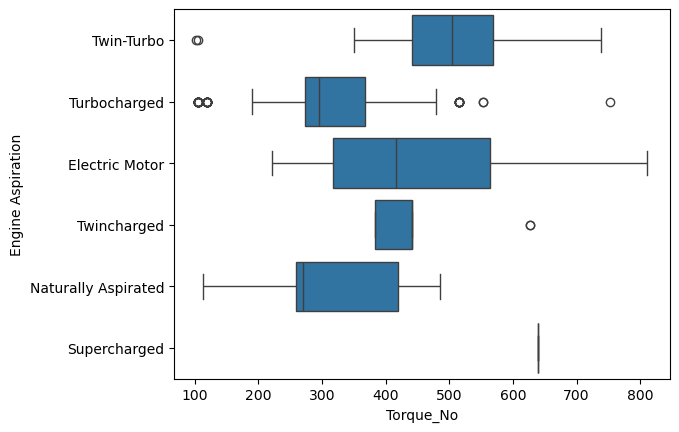

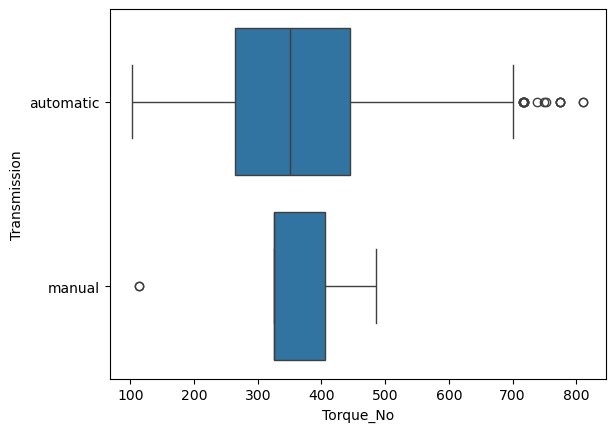

In [41]:
fig,axs = plt.subplots(figsize=(6,4),constrained_layout=True)

num_visl = [ 'MSRP', 'Used/New Price', 'Horsepower_No', 'Torque_No']

cat_visl = ['Make', 'Body Size','Body Style', 'Engine Aspiration','Transmission']

for num in num_visl:
    for cat in cat_visl:
        axs.set_title(f"{num} vs {cat}")
        sns.boxplot(data=df,x=num,y=cat)
        plt.show()        
    

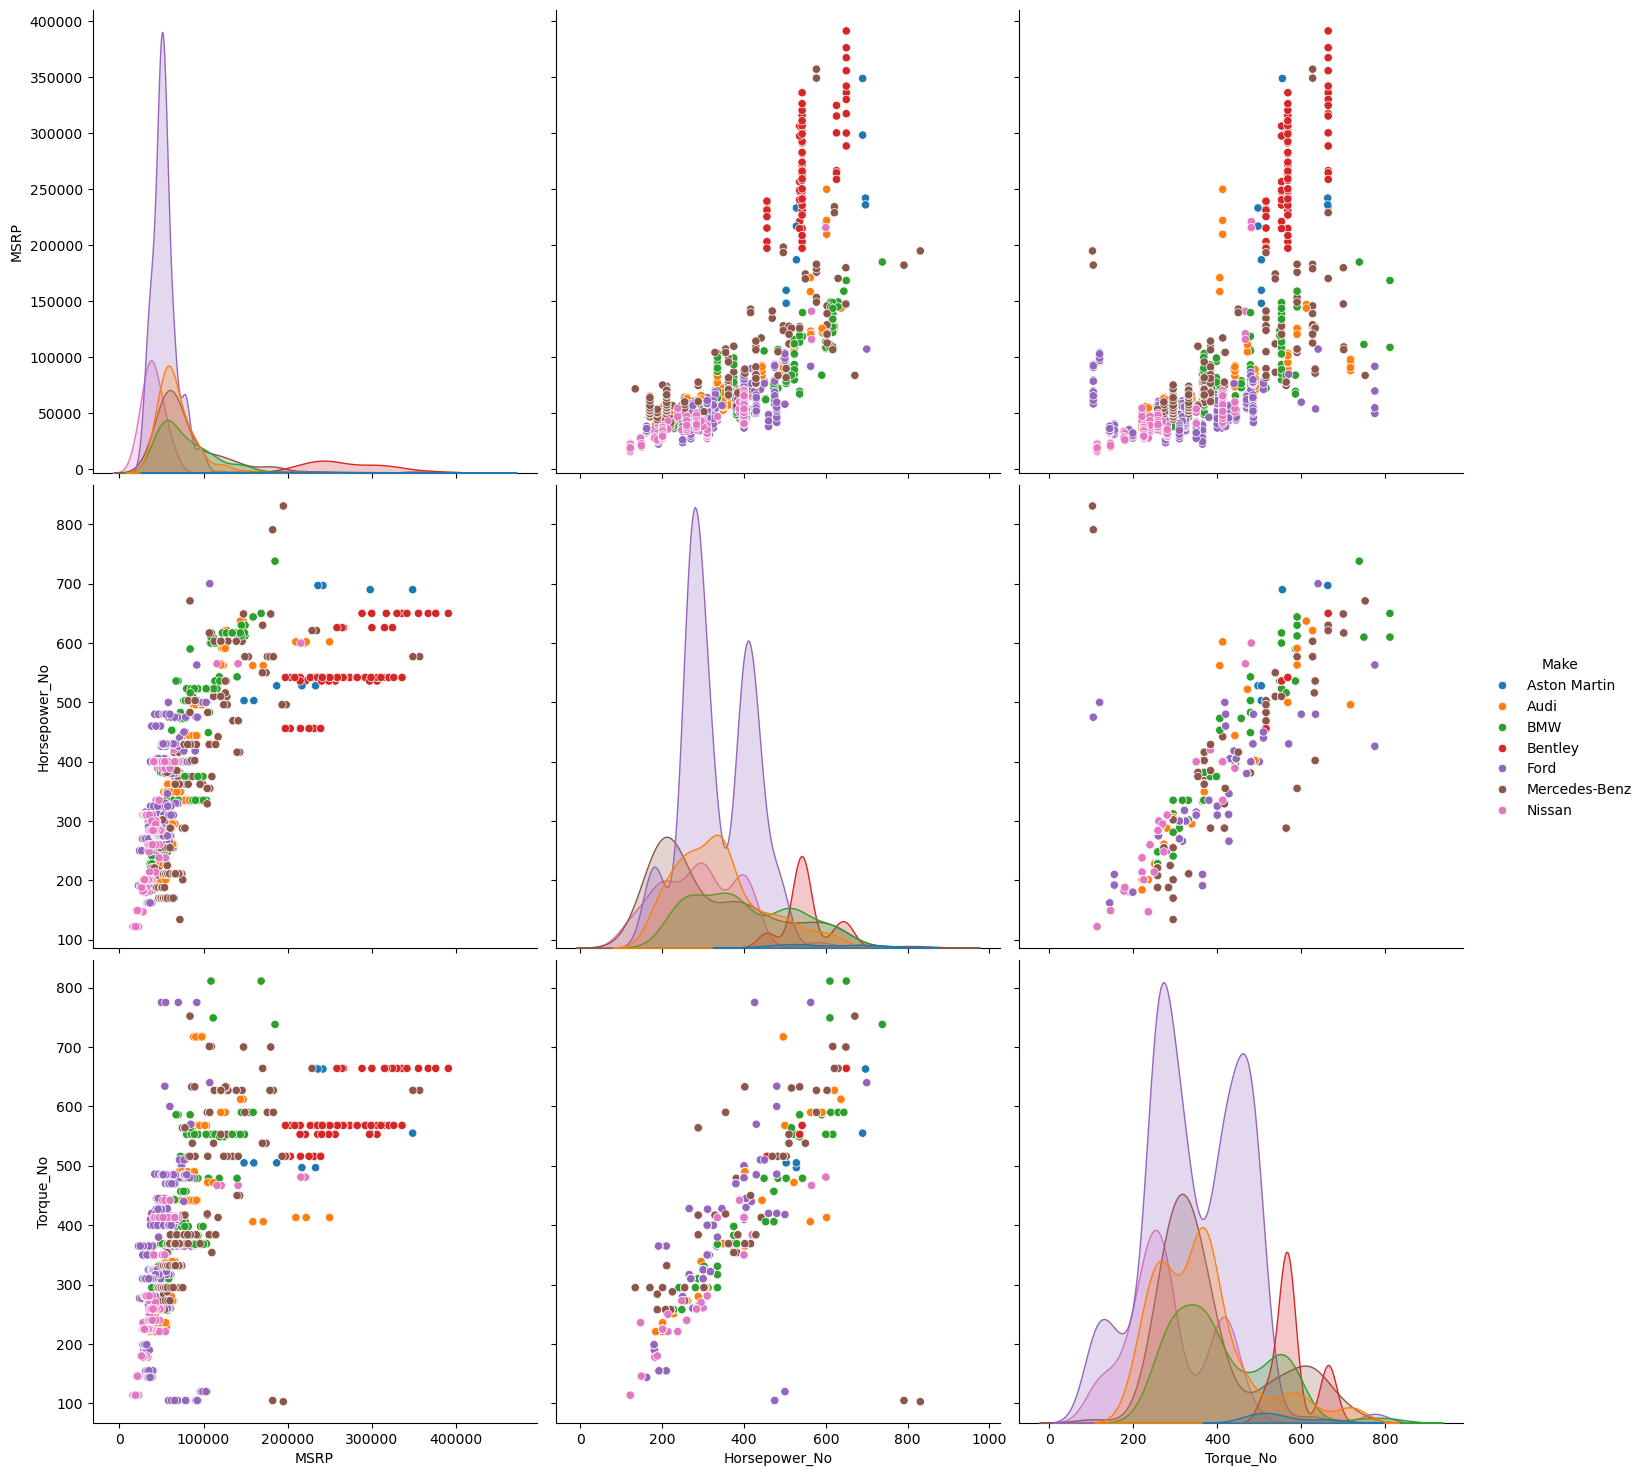

In [42]:
sns.pairplot(df[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']], hue = 'Make', height = 5)

# ✅ Feature Importances

<Axes: >

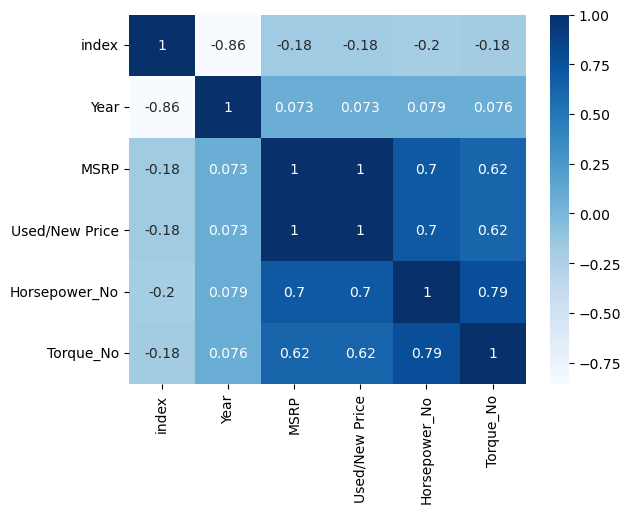

In [44]:
num_df = df.select_dtypes(include=["int","float"])

sns.heatmap(num_df.corr(),annot=True,cmap="Blues")

#  ✅  BUILDING ML MODEL

In [46]:

new_car_data = df.drop(['index', 'Model','Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)

new_car_data = pd.get_dummies(new_car_data, columns = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission'])

new_car_data.head()

MSRP  Horsepower_No  Torque_No  Make_Aston Martin  Make_Audi  Make_BMW  \
0  242000.0          697.0      663.0               True      False     False   
1   35800.0          201.0      221.0              False       True     False   
2   37800.0          201.0      221.0              False       True     False   
3   41400.0          201.0      221.0              False       True     False   
4   39400.0          201.0      221.0              False       True     False   

   Make_Bentley  Make_Ford  Make_Mercedes-Benz  Make_Nissan  ...  \
0         False      False               False        False  ...   
1         False      False               False        False  ...   
2         False      False               False        False  ...   
3         False      False               False        False  ...   
4         False      False               False        False  ...   

   Engine Aspiration_Supercharged  Engine Aspiration_Turbocharged  \
0                           False                           False   
1                           False                            True   
2                           False                            True   
3                           False                            True   
4                           False                            True   

   Engine Aspiration_Twin-Turbo  Engine Aspiration_Twincharged  \
0                          True                          False   
1                         False                          False   
2                         False                          False   
3                         False                          False   
4                         False                          False   

   Drivetrain_4WD  Drivetrain_AWD  Drivetrain_FWD  Drivetrain_RWD  \
0           False            True           False           False   
1           False           False            True           False   
2           False            True           False           False   
3           False            True           False           False   
4           False           False            True           False   

   Transmission_automatic  Transmission_manual  
0                    True                False  
1                    True                False  
2                    True                False  
3                    True                False  
4                    True                False  

[5 rows x 37 columns]

In [47]:
X = new_car_data.drop(['MSRP'], axis = 1).values
X_columns = new_car_data.drop(['MSRP'], axis = 1)
y = new_car_data['MSRP'].astype(int)

print(X.shape)
print(y.shape)


from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

(1610, 36)
(1610,)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [48]:

for i, column in enumerate(new_car_data.drop('MSRP', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Horsepower_No:, 0.250
Importance of feature Torque_No:, 0.115
Importance of feature Make_Aston Martin:, 0.000
Importance of feature Make_Audi:, 0.024
Importance of feature Make_BMW:, 0.011
Importance of feature Make_Bentley:, 0.013
Importance of feature Make_Ford:, 0.124
Importance of feature Make_Mercedes-Benz:, 0.023
Importance of feature Make_Nissan:, 0.006
Importance of feature Body Size_Compact:, 0.015
Importance of feature Body Size_Large:, 0.039
Importance of feature Body Size_Midsize:, 0.042
Importance of feature Body Style_Cargo Minivan:, 0.001
Importance of feature Body Style_Cargo Van:, 0.025
Importance of feature Body Style_Convertible:, 0.009
Importance of feature Body Style_Convertible SUV:, 0.003
Importance of feature Body Style_Coupe:, 0.005
Importance of feature Body Style_Hatchback:, 0.001
Importance of feature Body Style_Passenger Minivan:, 0.001
Importance of feature Body Style_Passenger Van:, 0.003
Importance of feature Body Style_Pickup Truck

index                               Variable  Feature Importance Score
0       0                          Horsepower_No                  0.250336
1       6                              Make_Ford                  0.123898
2       1                              Torque_No                  0.114594
3      27         Engine Aspiration_Turbocharged                  0.088182
4      11                      Body Size_Midsize                  0.041936
5      10                        Body Size_Large                  0.038856
6      33                         Drivetrain_RWD                  0.035074
7      21                         Body Style_SUV                  0.031852
8      30                         Drivetrain_4WD                  0.029195
9      25  Engine Aspiration_Naturally Aspirated                  0.027095
10     13                   Body Style_Cargo Van                  0.025117
11      3                              Make_Audi                  0.023597
12     22                       Body Style_Sedan                  0.022887
13      7                     Make_Mercedes-Benz                  0.022559
14     31                         Drivetrain_AWD                  0.018103
15      9                      Body Size_Compact                  0.015023
16     20                Body Style_Pickup Truck                  0.014676
17      5                           Make_Bentley                  0.012667
18      4                               Make_BMW                  0.011467
19     28           Engine Aspiration_Twin-Turbo                  0.009196
20     14                 Body Style_Convertible                  0.008519
21      8                            Make_Nissan                  0.005824
22     24       Engine Aspiration_Electric Motor                  0.005287
23     16                       Body Style_Coupe                  0.004933
24     19               Body Style_Passenger Van                  0.003465
25     15             Body Style_Convertible SUV                  0.002793
26     34                 Transmission_automatic                  0.002349
27     32                         Drivetrain_FWD                  0.002132
28     23                       Body Style_Wagon                  0.001900
29     35                    Transmission_manual                  0.001891
30     12               Body Style_Cargo Minivan                  0.001284
31     29          Engine Aspiration_Twincharged                  0.001233
32     18           Body Style_Passenger Minivan                  0.001195
33     17                   Body Style_Hatchback                  0.000886
34     26         Engine Aspiration_Supercharged                  0.000000
35      2                      Make_Aston Martin                  0.000000

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1288, 36)
(322, 36)
(1288,)
(322,)


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
all_df_predict = lm.predict(X)


In [98]:

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   


print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )


print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))

print('Coefficients: ', lm.coef_ )


print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.895779183244086
The Accuracy r2  on the training dataset prediction is:  0.895779183244086
The Accuracy  on the testing dataset is:  0.9198625302493006
The RMSE  on the training dataset is:  17421.7784480966
The RMSE  on the testing dataset is:  16534.594571973666
The MAE  on the training dataset is:  10599.011937878482
The MAE  on the testing dataset is:  11090.088349592685
Coefficients:  [ 2.22742940e+02 -1.89829669e+01  5.56034182e+04 -2.91161207e+04
 -3.66042366e+04  1.16226113e+05 -4.43839570e+04 -1.62628570e+04
 -4.54623600e+04  9.29404094e+01 -1.88423591e+02  9.54831816e+01
  6.09802309e+02  8.15969817e+03  1.42360673e+04  1.18332658e+02
  6.41353581e+02 -4.42967483e+03  6.15846845e+03  8.27078966e+03
 -1.77754623e+04 -5.15286113e+03 -3.70758421e+03 -7.12892964e+03
  6.29975752e+03  1.80270043e+03 -1.34977391e+04 -2.53004586e+02
  1.07576585e+04 -5.10937274e+03  4.83989383e+03 -3.37471593e+03
  4.33305973e+03 -5.79823762e+03  1.039451

In [100]:
import pickle
with open('linear_model_car_price.pkl', 'wb') as f:
    pickle.dump(lm, f)

In [102]:
final_fi['Feature Importance Score'] = final_fi['Feature Importance Score'].round(4)
final_fi = final_fi.head(27)
final_fi.to_excel("feature_importance.xlsx")

In [108]:
df['MSRP Predictions'] = all_df_predict


df.to_excel("data_with_pred.xlsx")

In [112]:
import streamlit as st

def get_user_input():
    horsepower = st.sidebar.number_input('Horsepower (No)', min_value=0, max_value=1000, step=1, value=300)
    torque = st.sidebar.number_input('Torque (No)', min_value=0, max_value=1500, step=1, value=400)
    
    make = st.sidebar.selectbox('Make', ['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Ford', 'Mercedes-Benz', 'Nissan'])
    body_size = st.sidebar.selectbox('Body Size', ['Compact', 'Large', 'Midsize'])
    body_style = st.sidebar.selectbox('Body Style', [
        'Cargo Minivan', 'Cargo Van', 'Convertible', 'Convertible SUV', 'Coupe', 'Hatchback', 
        'Passenger Minivan', 'Passenger Van', 'Pickup Truck', 'SUV', 'Sedan', 'Wagon'
    ])
    engine_aspiration = st.sidebar.selectbox('Engine Aspiration', [
        'Electric Motor', 'Naturally Aspirated', 'Supercharged', 'Turbocharged', 'Twin-Turbo', 'Twincharged'
    ])
    drivetrain = st.sidebar.selectbox('Drivetrain', ['4WD', 'AWD', 'FWD', 'RWD'])
    transmission = st.sidebar.selectbox('Transmission', ['automatic', 'manual'])
    
    user_data = {
        'Horsepower_No': horsepower,
        'Torque_No': torque,
        f'Make_{make}': 1,
        f'Body Size_{body_size}': 1,
        f'Body Style_{body_style}': 1,
        f'Engine Aspiration_{engine_aspiration}': 1,
        f'Drivetrain_{drivetrain}': 1,
        f'Transmission_{transmission}': 1,
    }
    return user_data

user_data = get_user_input()
user_data



2025-12-11 22:51:18.822 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-12-11 22:51:18.860 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


{'Horsepower_No': 300,
 'Torque_No': 400,
 'Make_Aston Martin': 1,
 'Body Size_Compact': 1,
 'Body Style_Cargo Minivan': 1,
 'Engine Aspiration_Electric Motor': 1,
 'Drivetrain_4WD': 1,
 'Transmission_automatic': 1}

In [114]:

def prepare_input(data, feature_list):
    input_data = {feature: data.get(feature, 0) for feature in feature_list}
    return np.array([list(input_data.values())])

features = [
    'Horsepower_No', 'Torque_No', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
    'Make_Ford', 'Make_Mercedes-Benz', 'Make_Nissan', 'Body Size_Compact', 'Body Size_Large',
    'Body Size_Midsize', 'Body Style_Cargo Minivan', 'Body Style_Cargo Van', 
    'Body Style_Convertible', 'Body Style_Convertible SUV', 'Body Style_Coupe', 
    'Body Style_Hatchback', 'Body Style_Passenger Minivan', 'Body Style_Passenger Van',
    'Body Style_Pickup Truck', 'Body Style_SUV', 'Body Style_Sedan', 'Body Style_Wagon',
    'Engine Aspiration_Electric Motor', 'Engine Aspiration_Naturally Aspirated',
    'Engine Aspiration_Supercharged', 'Engine Aspiration_Turbocharged',
    'Engine Aspiration_Twin-Turbo', 'Engine Aspiration_Twincharged', 
    'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 
    'Transmission_automatic', 'Transmission_manual']


input_array = prepare_input(user_data, features)
input_array

array([[300, 400,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   1,   0]])

In [116]:
prediction = lm.predict(input_array)
prediction

array([161260.2364456])

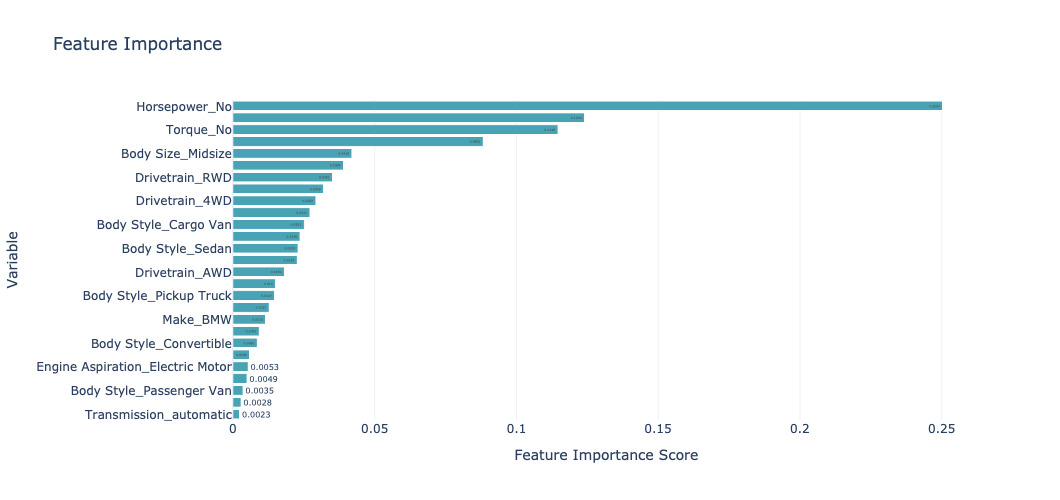

In [118]:
import plotly.express as px

final_fi_sorted = final_fi.sort_values(by='Feature Importance Score', ascending=True)

fig = px.bar(
    final_fi_sorted,
    x='Feature Importance Score',
    y='Variable',
    orientation='h',
    title="Feature Importance",
    labels={'Feature Importance Score': 'Importance', 'Variable': 'Feature'},
    text='Feature Importance Score',
    color_discrete_sequence=['#48a3b4']  
)
fig.update_layout(
    xaxis_title="Feature Importance Score",
    yaxis_title="Variable",
    template="plotly_white",
    height=500
)

fig.show()

In [122]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
from PIL import Image


st.set_page_config(layout="wide")


with open('linear_model_car_price.pkl', 'rb') as f:
    lm2 = pickle.load(f)


def load_feature_importance(file_path):
    return pd.read_excel(file_path)

final_fi = load_feature_importance("feature_importance.xlsx")  


image_sidebar = Image.open('fig_123.png') 
st.sidebar.image(image_sidebar, use_column_width=True)
st.sidebar.header('Vehicle Features')

def get_user_input():
    horsepower = st.sidebar.number_input('Horsepower (No)', min_value=0, max_value=1000, step=1, value=300)
    torque = st.sidebar.number_input('Torque (No)', min_value=0, max_value=1500, step=1, value=400)
    
    make = st.sidebar.selectbox('Make', ['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Ford', 'Mercedes-Benz', 'Nissan'])
    body_size = st.sidebar.selectbox('Body Size', ['Compact', 'Large', 'Midsize'])
    body_style = st.sidebar.selectbox('Body Style', [
        'Cargo Minivan', 'Cargo Van', 'Convertible', 'Convertible SUV', 'Coupe', 'Hatchback', 
        'Passenger Minivan', 'Passenger Van', 'Pickup Truck', 'SUV', 'Sedan', 'Wagon'
    ])
    engine_aspiration = st.sidebar.selectbox('Engine Aspiration', [
        'Electric Motor', 'Naturally Aspirated', 'Supercharged', 'Turbocharged', 'Twin-Turbo', 'Twincharged'
    ])
    drivetrain = st.sidebar.selectbox('Drivetrain', ['4WD', 'AWD', 'FWD', 'RWD'])
    transmission = st.sidebar.selectbox('Transmission', ['automatic', 'manual'])
    
    user_data = {
        'Horsepower_No': horsepower,
        'Torque_No': torque,
        f'Make_{make}': 1,
        f'Body Size_{body_size}': 1,
        f'Body Style_{body_style}': 1,
        f'Engine Aspiration_{engine_aspiration}': 1,
        f'Drivetrain_{drivetrain}': 1,
        f'Transmission_{transmission}': 1,
    }
    return user_data


image_banner = Image.open('fig_124.PNG') 
st.image(image_banner, use_column_width=True)


st.markdown("<h1 style='text-align: center;'>Vehicle Price Prediction App</h1>", unsafe_allow_html=True)


left_col, right_col = st.columns(2)

with left_col:
    st.header("Feature Importance")
    
    final_fi_sorted = final_fi.sort_values(by='Feature Importance Score', ascending=True)
    
    fig = px.bar(
        final_fi_sorted,
        x='Feature Importance Score',
        y='Variable',
        orientation='h',
        title="Feature Importance",
        labels={'Feature Importance Score': 'Importance', 'Variable': 'Feature'},
        text='Feature Importance Score',
        color_discrete_sequence=['#48a3b4']  
    )
    fig.update_layout(
        xaxis_title="Feature Importance Score",
        yaxis_title="Variable",
        template="plotly_white",
        height=500
    )
    st.plotly_chart(fig, use_container_width=True)

with right_col:
    st.header("Predict Vehicle Price")
    
    user_data = get_user_input()

    def prepare_input(data, feature_list):
        input_data = {feature: data.get(feature, 0) for feature in feature_list}
        return np.array([list(input_data.values())])

    features = [
        'Horsepower_No', 'Torque_No', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
        'Make_Ford', 'Make_Mercedes-Benz', 'Make_Nissan', 'Body Size_Compact', 'Body Size_Large',
        'Body Size_Midsize', 'Body Style_Cargo Minivan', 'Body Style_Cargo Van', 
        'Body Style_Convertible', 'Body Style_Convertible SUV', 'Body Style_Coupe', 
        'Body Style_Hatchback', 'Body Style_Passenger Minivan', 'Body Style_Passenger Van',
        'Body Style_Pickup Truck', 'Body Style_SUV', 'Body Style_Sedan', 'Body Style_Wagon',
        'Engine Aspiration_Electric Motor', 'Engine Aspiration_Naturally Aspirated',
        'Engine Aspiration_Supercharged', 'Engine Aspiration_Turbocharged',
        'Engine Aspiration_Twin-Turbo', 'Engine Aspiration_Twincharged', 
        'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 
        'Transmission_automatic', 'Transmission_manual'
    ]

    if st.button("Predict"):
        input_array = prepare_input(user_data, features)
        prediction = lm2.predict(input_array)
        st.subheader("Predicted Price")
        st.write(f"${prediction[0]:,.2f}")